# Visualizing distance with Datashader and Panel

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import altair as alt
import holoviews as hv
import geoviews as gv
import param as pm
import panel as pn
from colorcet import cm
import datashader as ds
from holoviews.operation.datashader import rasterize, shade
from shapely.geometry import Point

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
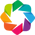

In [2]:
# Enable Altair and Holoviews rendering in the notebook
# Add the Vega extension for Panel
pn.extension('vega')
#alt.renderers.enable('notebook')
hv.extension('bokeh')

In [3]:
# Add an external CSS file to make it look nicer!
pn.extension(css_files=["https://codepen.io/chriddyp/pen/bWLwgP.css"])

In [4]:
# Read the data 
DATA = pd.read_csv('Data/dist.csv')

**Note**

We'll load the *full* data above, and when the user changes input parameters, we'll filter the full data set in our app according to those parameters.

In [5]:
DATA.head()

Unnamed: 0        id          x          y  \
0           0  30807308 -73.962176  40.792024   
1           1  30807309 -73.962407  40.791687   
2           2  30807310 -73.962498  40.791550   
3           3  30807314 -73.963578  40.790724   
4           4  30807336 -73.964181  40.788475   

                                geometry  fastfood_1  fastfood_2  fastfood_3  \
0         POINT (-73.9621757 40.7920236)  463.039001  534.862976  590.109009   
1          POINT (-73.962407 40.7916869)  476.906006  490.960999  571.124023   
2    POINT (-73.96249779999999 40.79155)  473.923004  493.944000  554.085999   
3         POINT (-73.9635782 40.7907244)  416.079987  483.605011  494.161987   
4  POINT (-73.9641811 40.78847529999999)  687.552002  714.736023  755.077026   

   fastfood_4  fastfood_5  ...     market_1     market_2     market_3  \
0  615.026001  625.583008  ...  2015.677979  4624.346191  4979.435059   
1  581.681030  603.976013  ...  1970.670044  4579.337891  4934.426758   
2  564.643005  621.013977  ...  1953.631958  4562.299805  4917.389160   
3  611.297974  706.612000  ...  1832.334961  4441.002930  4796.091797   
4  765.633972  882.770020  ...  1632.854980  4211.426758  4571.346191   

   market_4  market_5  supermarket_1  supermarket_2  supermarket_3  \
0    5000.0    5000.0     325.010986     699.565002     784.247986   
1    5000.0    5000.0     338.877991     655.663025     740.346008   
2    5000.0    5000.0     355.915985     638.625000     723.307983   
3    5000.0    5000.0     473.269989     580.781982     642.818970   
4    5000.0    5000.0     602.379028     615.456970     744.742004   

   supermarket_4  supermarket_5  
0     901.033020     902.393982  
1     858.492004     889.679016  
2     841.453979     872.640991  
3     762.224976     783.611023  
4     852.254028     869.770996  

[5 rows x 25 columns]

In [6]:
DATA = gpd.GeoDataFrame(DATA, geometry=gpd.points_from_xy(DATA.x, DATA.y), crs={"init": "epsg:4326"})
DATA = DATA.to_crs({'init': 'epsg:3857'})
DATA['x_col'] = DATA['geometry'].x
DATA['y_col'] = DATA['geometry'].y
DATA = DATA.drop(columns = ['geometry','Unnamed: 0'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/srv/conda/envs/notebook/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [7]:
pd.set_option('display.max_columns', 999)

In [8]:
DATA.head()

id          x          y  fastfood_1  fastfood_2  fastfood_3  \
0  30807308 -73.962176  40.792024  463.039001  534.862976  590.109009   
1  30807309 -73.962407  40.791687  476.906006  490.960999  571.124023   
2  30807310 -73.962498  40.791550  473.923004  493.944000  554.085999   
3  30807314 -73.963578  40.790724  416.079987  483.605011  494.161987   
4  30807336 -73.964181  40.788475  687.552002  714.736023  755.077026   

   fastfood_4  fastfood_5  convenience_1  convenience_2  convenience_3  \
0  615.026001  625.583008     463.039001     615.026001     625.583008   
1  581.681030  603.976013     476.906006     571.124023     581.681030   
2  564.643005  621.013977     493.944000     554.085999     564.643005   
3  611.297974  706.612000     483.605011     494.161987     562.562988   
4  765.633972  882.770020     668.963989     668.963989     683.463013   

   convenience_4  convenience_5     market_1     market_2     market_3  \
0     693.984009     707.267029  2015.677979  4624.346191  4979.435059   
1     650.081970     721.133972  1970.670044  4579.337891  4934.426758   
2     633.044006     738.171997  1953.631958  4562.299805  4917.389160   
3     611.297974     773.515015  1832.334961  4441.002930  4796.091797   
4     755.077026     765.633972  1632.854980  4211.426758  4571.346191   

   market_4  market_5  supermarket_1  supermarket_2  supermarket_3  \
0    5000.0    5000.0     325.010986     699.565002     784.247986   
1    5000.0    5000.0     338.877991     655.663025     740.346008   
2    5000.0    5000.0     355.915985     638.625000     723.307983   
3    5000.0    5000.0     473.269989     580.781982     642.818970   
4    5000.0    5000.0     602.379028     615.456970     744.742004   

   supermarket_4  supermarket_5         x_col         y_col  
0     901.033020     902.393982 -8.233432e+06  4.981713e+06  
1     858.492004     889.679016 -8.233457e+06  4.981664e+06  
2     841.453979     872.640991 -8.233468e+06  4.981644e+06  
3     762.224976     783.611023 -8.233588e+06  4.981522e+06  
4     852.254028     869.770996 -8.233655e+06  4.981192e+06

In [9]:
# The colormaps we can choose from
cmaps = ['fire','bgy','bgyw','bmy','gray','kbc']

# Define the options for the basemap tiles that we'll use
opts = dict(xaxis=None, yaxis=None, bgcolor="black", show_grid=False)

In [10]:
class DistanceApp(pm.Parameterized):
    """
    A Panel-based dashboard app visualizing data for 120809 
    rows that dipicts distance to amenities in Brooklyn and Queens.
    
    The app has three main components:
        1. A datashaded heatmap of road network nodes with distance to amenities
        2. A set of widgets controlling the data plotted on the map
        3. A histogram of the distance of nodes to amenities
        
    The histogram is linked to the Holoviews map and only plots the 
    histogram of data currently displayed on the map. 
    """
    # Map opacity
    alpha = pm.Magnitude(default=0.75, doc="Alpha value for the map opacity")
    
    # Colormap
    cmap = pm.ObjectSelector(cm["fire"], objects={c: cm[c] for c in cmaps})
    
    # Distance to Amenity
    distance = pm.Integer(500, bounds=(200, 3000))

    # Nth node
    The_Closest_Nth_Amenity = pm.ObjectSelector(default='1', objects=['1', '2', '3', '4','5'])
    
    # Amenity
    Amenity_1 = pm.ObjectSelector(default='fastfood', objects=['fastfood', 'convenience', 'market', 'supermarket'])
    Amenity_2 = pm.ObjectSelector(default='supermarket', objects=['fastfood', 'convenience', 'market', 'supermarket'])

    # Selection that gives the current x_range/y_range of the map
    box = hv.streams.RangeXY(x_range=None, y_range=None)

    @pm.depends("Amenity_1", "The_Closest_Nth_Amenity", "distance")
    def points(self, x_range=None, y_range=None):
        """
        Get a Holoviews.Points object holding the taxi data. 
        
        Before returning, filter the points by dropoff hour 
        and x/y range.
        """
        # create the Points object holding all data
        value = f"{self.Amenity_1}_{self.The_Closest_Nth_Amenity}"
        di = self.distance
        xcol = 'x_col'
        ycol = 'y_col'
        points = hv.Points(DATA[DATA[value]<di], kdims=[xcol, ycol], vdims=[value])
        
        # trim by x range of plot
        if x_range is not None:
            points = points.select(**{xcol: x_range})

        # trim by y range of plot
        if y_range is not None:
            points = points.select(**{ycol: y_range})

        return points

    def heatmap(self, **kwargs):
        """
        Return a datashaded heatmap of the taxi trips.
        """

        # create a dynamic map using the points() function
        # and link the box selection stream to the map
        points = hv.DynamicMap(self.points, streams=[self.box])

        # aggregate the points by counting them up on a mesh
        agg = rasterize(points, x_sampling=1, y_sampling=1, width=800, height=400)

        # the background tiles
        tiles = gv.tile_sources.CartoDark().apply.opts(alpha=self.param.alpha, **opts)

        # return datashaded heatmap
        heatmap = tiles * shade(agg, cmap=self.param.cmap)

        return heatmap.options(
            default_tools=["save", "pan", "box_zoom", "reset"],
            active_tools=["box_zoom"],
            width=550,
            height=420,
        )

    @pm.depends("Amenity_1", "Amenity_2","box.x_range", "box.y_range")
    def passenger_hist(self):
        """
        Return an Altair histogram showing the distance 
        per trip.
        
        This chart depends on the box selection's x/y range and will be 
        re-drawn when the bounds of the map are updated by the user.
        """
        # Trim to 5000 to allow altair to plot
        DATA_trim = DATA[(DATA[f'{self.Amenity_1}_1']<5000) & (DATA[f'{self.Amenity_2}_1']<5000)]
        N = 5000
        DATA_trim = DATA_trim.sample(N)

        # make the Altair chart
        chart = (
            alt.Chart(DATA_trim)
            .mark_circle(size = 20,color='#f29c50')
            .encode(
                x=alt.X(f'{self.Amenity_1}_1:Q',title = f'Distance to {self.Amenity_1}'),
                y=alt.Y(f'{self.Amenity_2}_1:Q',title = f'Distance to {self.Amenity_2}'),
                tooltip=['x', 'y', f'{self.Amenity_1}_1', f'{self.Amenity_2}_1']
            ).properties(width=500, height=300).interactive()
        )

        return pn.Pane(chart, width=800)

In [11]:
# initialize our app
app = DistanceApp(name="")

## Layout our Panel object

We will use a combination of the `Column()` and `Row()` objects to create out layout. Also, we can use the `Spacer()` object to explicitly add more blank space of fixed width/height.

In [21]:
# The app's title, defined as an h2 HTML elemtn
title = pn.pane.HTML(
    "<h2>Distance of Street Network Nodes to Amenities in Queens and Brooklyn, New York</h2><p6>All widgets below modifies the map except for the second location widget, which modifies the scatter plot: Amenity 1 only modifies the map, while both Amenity 1 and 2 modify the plot.</p6>",
    style={"width": "800px", "text-align": "left"},
)

#The title of the histogram (h3 element)
hist_title = pn.pane.HTML(
    "<h3>Associations between Amenities</h3><p6>Choose from the above two amenities</p6>",
    style={"width": "800px", "text-align": "left"},
)

In [29]:
description = pn.pane.HTML('''
<p6>Access to healthy and affordable food sources can be difficult in many parts of the United States, 
even in big cities like New York. According to the United States Department of Agriculture (USDA), 
about 13.5 million Americans have limited access to supermarkets or grocery stores and 82% of them live in urban areas. 
In order to improve public health and general welfare, it is important to correctly identify food deserts, 
which is defined as low-income census tracts in which a large amount or percentage of residents have difficulty access to retail outlets selling healthy and affordable food. 
Through this project, we explored the issue of food deserts within Brooklyn and Queens in New York, United States. 
<br><br>  Previously, Michael J.Widener and Wenwen Li explored the relationship between food deserts and healthy and unhealthy food in tweets in Using geolocated 
Twitter data to monitor the prevalence of healthy and unhealthy food references across the US. Inspired by their work, 
we looked at food-related tweets generated in Queens and Brooklyn and used them for sentiment analysis. 
We also used demographic characteristics and distance to food-related amenities to predict the presence of food deserts in Brooklyn and Queens, 
New York using a Random Forest machine learning model.</p6>''', width=800)

In [32]:
# Layout the dashboard
panel = pn.Column(
    pn.Row(pn.Spacer(width=15), description),
    pn.Row(title),
    pn.Row(pn.Param(app.param, expand_button=False, width=200), app.heatmap()),
    pn.Row(hist_title),
    pn.Row(pn.Spacer(width=75), app.passenger_hist),
    align="center",
    width=1200,
)

In [33]:
panel.servable()

Column(align='center', width=1200)
    [0] Row
        [0] Spacer(width=15)
        [1] HTML(str, width=800)
    [1] Row
        [0] HTML(str, style={'width': '800px', ...})
    [2] Row
        [0] Param(DistanceApp, expand_button=False, width=200)
        [1] HoloViews(DynamicMap)
    [3] Row
        [0] HTML(str, style={'width': '800px', ...})
    [4] Row
        [0] Spacer(width=75)
        [1] ParamMethod(method)